[[]]


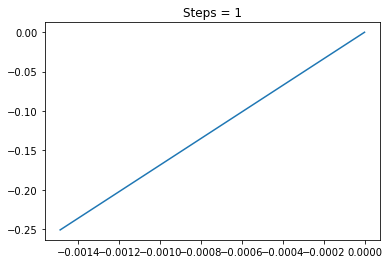

[[[1]], []]
[[[1]], [[0], [2]]]


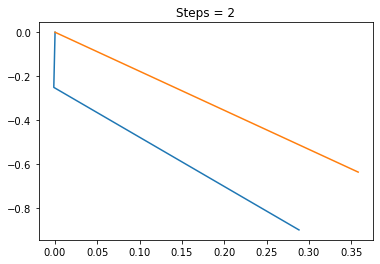

[[[3]], [], []]
[[[3]], [(3, 4)], []]
[[[3]], [(3, 4)], [[1], [4]]]


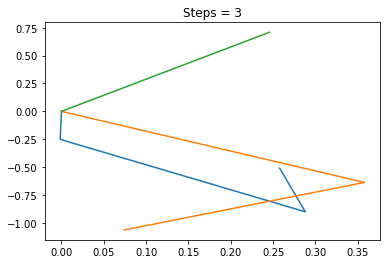

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from collections import OrderedDict
import more_itertools as mit

N = 4 # number of steps
bp = 0.5
off = 1

# From stack exchange, create function which can calculate the angle between line and x-axis
# & funciton which compares angles btw radians
# & fnc which finds intersecting range - modified for sets

def angle_trunc(a):
    while a < 0.0:
        a += pi * 2
    while a > 2 * pi:
        a -= pi * 2
    return a

def AngleBtwPt(x_orig, y_orig, x_landmark, y_landmark):
    deltaY = y_landmark - y_orig
    deltaX = x_landmark - x_orig
    return angle_trunc(math.atan2(deltaY, deltaX))

def get_intersect(r1, r2):
        left = max(r1[0], r2[0])
        right = min(r1[1], r2[1])
        if left>right:
            return None
        return (left,right)
    
def countX(lst, x):
    return lst.count(x)

def find_ranges(iterable):
    for group in mit.consecutive_groups(iterable):
        group = list(group)
        if len(group) == 1:
            yield [group[0]]
        else:
            yield group[0], group[-1]

# walker 1
w1 = [[0,0]]

# creating list of walkers
a = [w1]

# angle list, alpha list, intersection list (one for each walker)
angles = [] # 3D list: a list of lists of lists
#theta = []
alphas = [] # a list of angle ranges
numlines = [] # a list of dictionaries
ans = [] # a list of lists of keys
distinct_angles = []

for iN in range(1,N):
    
    # removes "memory" of previous step
    angles.clear()
    alphas.clear()
    numlines.clear()
    ans.clear()
    distinct_angles.clear()
    
    plt.title("Random Walk ($n = " + str(iN) + "$ steps)")

    b0 = len(a)
    for j in range(b0): # Anya's part
        
        # find the change in position
        dp = [2*np.random.random()-1, 2*np.random.random()-1]

        # add new position to walker path
        a[j].append([sum(z) for z in zip(a[j][-1],dp)])    

        # branch with probability bp at specified offset, if possible
        if (np.random.random() < bp) & (off < len(a[j])):
            a.append([a[j][-(1+off)].copy()])
         
        # initialize lists of data structures to have the right number of (empty) eleemntes
        angles.append([])
        numlines.append({})
        alphas.append([])
        ans.append([]) # right?    
        distinct_angles.append([])
    
    # go thru all branches   
    for ik in range(b0): # ik = i check # for other avoidance # angles are being recalculated, so I might be able to decrease run time if I figure out how
        # compare each branch a[ik] to all other branches, make angles 3D
        for it1 in range(b0): # calculate angles and find the max and min for w1
            angles[ik].append([])
            # go thru all the points in branch a[it1]
            for it11 in range(len(a[it1])):
                if not(it1 == ik and it11==len(a[it1])-1): #checking branch ik against itself ==> don't look at most recent point
                    #compare the tip of branch a[ik] to all poitns in branch a[it1]
                    theta = AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[it1][it11][0],a[it1][it11][1])
                    # add valid angles to angles (excluding most recent step by walker)
                    if theta != 0:
                        #if it1 != ik and it11 != (len(a[it1]) - 1):
                        angles[ik][it1].append(theta) # angles[ik][it1] = list of angles between wlaker ik and walker it1
                        if theta not in distinct_angles[ik]:
                            distinct_angles[ik].append(theta) 
            
        distinct_angles[ik] = list(OrderedDict.fromkeys(distinct_angles[ik]))

        n1 = [val for val in distinct_angles[ik] for x in (0, 1)]
        n1.append(2*np.pi)
        n1.append(0)

        n1 = sort(n1)

        n1 = [n1[i:i + 2] for i in range(0, len(n1), 2)]

        for val1 in range(len(n1)):
            numlines[ik][val1] = n1[val1]
       
        for it1 in range(b0):
            # craete alphas
            angles[ik][it1] = list(OrderedDict.fromkeys(angles[ik][it1]))
            
            for ia in range(1,len(angles[ik][it1])): # calculate angles and find the max and min for w1

                if angles[ik][it1][ia] < angles[ik][it1][ia - 1]:
                    th11 = angles[ik][it1][ia] # smaller
                    th12 = angles[ik][it1][ia - 1] # larger
                    dtheta1 = np.abs(angles[ik][it1][ia] - angles[ik][it1][ia - 1])

                elif angles[ik][it1][ia] > angles[ik][it1][ia - 1]:
                    th12 = angles[ik][it1][ia] # larger
                    th11 = angles[ik][it1][ia - 1] # smaller
                    dtheta1 = np.abs(angles[ik][it1][ia - 1] - angles[ik][it1][ia])

                if dtheta1 < np.pi:
                    alphas[ik].append([0,th11])
                    alphas[ik].append([th12,2*np.pi])

                elif dtheta1 > np.pi:
                    alphas[ik].append([th11,th12])

        for i11 in alphas[ik]:

            for i12 in range(len(numlines[ik])):

                if i11[0] == numlines[ik][i12][0]:

                    ans[ik].append(i12)

                    while i11[1] != numlines[ik][i12][1]:

                        i12 = i12 + 1

                        ans[ik].append(i12)

        ans[ik] = [item for item in ans[ik] if countX(ans[ik],item) == shape(angles[ik])[0] - 1]
        
        ans[ik] = sort(list(set(ans[ik]))).tolist()
        
        ans[ik] = list(find_ranges(ans[ik]))

        if shape(ans[ik])[0] == 1:
            
            if shape(ans[ik][0])[0] == 1:
                           
                while numlines[ik][ans[ik][0][0]][0] > AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) or AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) > numlines[ik][ans[ik][0][0]][1]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                
            elif shape(ans[ik][0])[0] > 1:

                while numlines[ik][ans[ik][0][0]][0] > AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) or AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) > numlines[ik][ans[ik][0][-1]][1]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
        
        elif shape(ans[ik])[0] > 1:
            
            if shape(ans[ik][0])[0] > 1:
            
                while numlines[ik][ans[ik][0][-1]][1] < AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) < numlines[ik][ans[ik][1][0]][0]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                
            elif shape(ans[ik][1])[0] > 1:

                while numlines[ik][ans[ik][0][0]][1] < AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) or AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) < numlines[ik][ans[ik][-1][0]][0]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                
            else:

                while numlines[ik][ans[ik][0][0]][1] < AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) < numlines[ik][ans[ik][1][0]][0]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                    
# plot the positions of both walkers
        x, y = zip(*a[ik])
        print(ans)
        plt.plot(x,y)
        plt.title('Steps = ' + str(iN))
    plt.show()

In [133]:
# Code below is just me printing statements to debug/understand code

In [58]:
a[it1]

[[0, 0], [-0.897623488555898, 0.27848674687512]]

In [65]:
numlines

[{0: array([0.        , 0.59200182]),
  1: array([0.59200182, 1.31123411]),
  2: array([1.31123411, 1.5970877 ]),
  3: array([1.5970877 , 1.88060036]),
  4: array([1.88060036, 1.99049493]),
  5: array([1.99049493, 6.28318531])},
 {0: array([0.        , 1.65399714]),
  1: array([1.65399714, 2.08300567]),
  2: array([2.08300567, 2.23619129]),
  3: array([2.23619129, 2.32101295]),
  4: array([2.32101295, 4.45282676]),
  5: array([4.45282676, 6.28318531])},
 {0: array([0.        , 4.70645617]),
  1: array([4.70645617, 4.78233966]),
  2: array([4.78233966, 5.02219301]),
  3: array([5.02219301, 5.18113028]),
  4: array([5.18113028, 5.22459833]),
  5: array([5.22459833, 6.28318531])}]

In [66]:
alphas

[[[0, 1.8806003583773934],
  [1.9904949278064021, 6.283185307179586],
  [0, 1.3112341054522911],
  [1.8806003583773934, 6.283185307179586],
  [0, 0.5920018159341833],
  [1.3112341054522911, 6.283185307179586],
  [0, 1.5970876973074664],
  [1.8806003583773934, 6.283185307179586]],
 [[0, 2.083005672890568],
  [2.321012954604791, 6.283185307179586],
  [0, 2.321012954604791],
  [4.452826759042084, 6.283185307179586],
  [0, 2.236191290374226],
  [4.452826759042084, 6.283185307179586],
  [0, 1.6539971373967877],
  [2.083005672890568, 6.283185307179586]],
 [[0, 4.706456171204496],
  [5.022193011967186, 6.283185307179586],
  [0, 5.022193011967186],
  [5.181130276560329, 6.283185307179586],
  [0, 4.782339661291911],
  [5.224598326480361, 6.283185307179586]]]

In [46]:
numlines

[{0: array([0.        , 2.45831961]), 1: array([2.45831961, 6.28318531])},
 {0: array([0.        , 1.27363762]),
  1: array([1.27363762, 5.59991227]),
  2: array([5.59991227, 6.28318531])}]

In [48]:
ans

[[], [[1]]]